In [37]:
import numpy as np
import matplotlib as mpl 

# Importing standard Qiskit libraries
from qiskit import execute, QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

# Get Input in decimal and covert to binary for computation

With qasm simulator, most devices can easily run around 32 qubits. Addition for each bit requires 3 qubits (1 extra for the first carry bit), so the simulator would be able add maximum of 10bit numbers i.e., upto 1024 + 1024.

In [26]:
b1 = int(input())
b2 = int(input())

b1 = f"{b1:b}"
b2 = f"{b2:b}"

while (len(b1) != len(b2)):
    if (len(b1) > len(b2)):
        b2 = "0" + b2
    else:
        b1 = "0" + b1
        

 938
 973


# Set up the Quantum Circuit

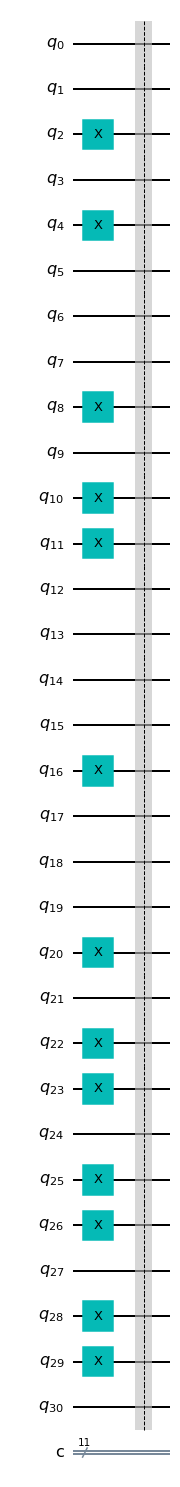

In [27]:
qc1 = QuantumCircuit( 3 * len(b1) + 1, len(b1) + 1)

#qc1.x(0) # First Carry Bit

for i in range(len(b1) - 1, -1, -1):
    if b1[i] == "1":
        qc1.x(3 * (len(b1) - 1 - i) + 1)
    if b2[i] == "1":
        qc1.x(3 * (len(b1) - 1 - i) + 2)
   
qc1.barrier()
qc1.draw("mpl")

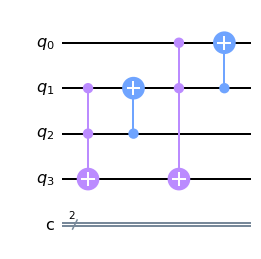

In [28]:
qc2 = QuantumCircuit(4,2)
qc2.ccx(1,2,3)
qc2.cx(2,1)
qc2.ccx(0,1,3)
qc2.cx(1,0)
qc2.draw("mpl")

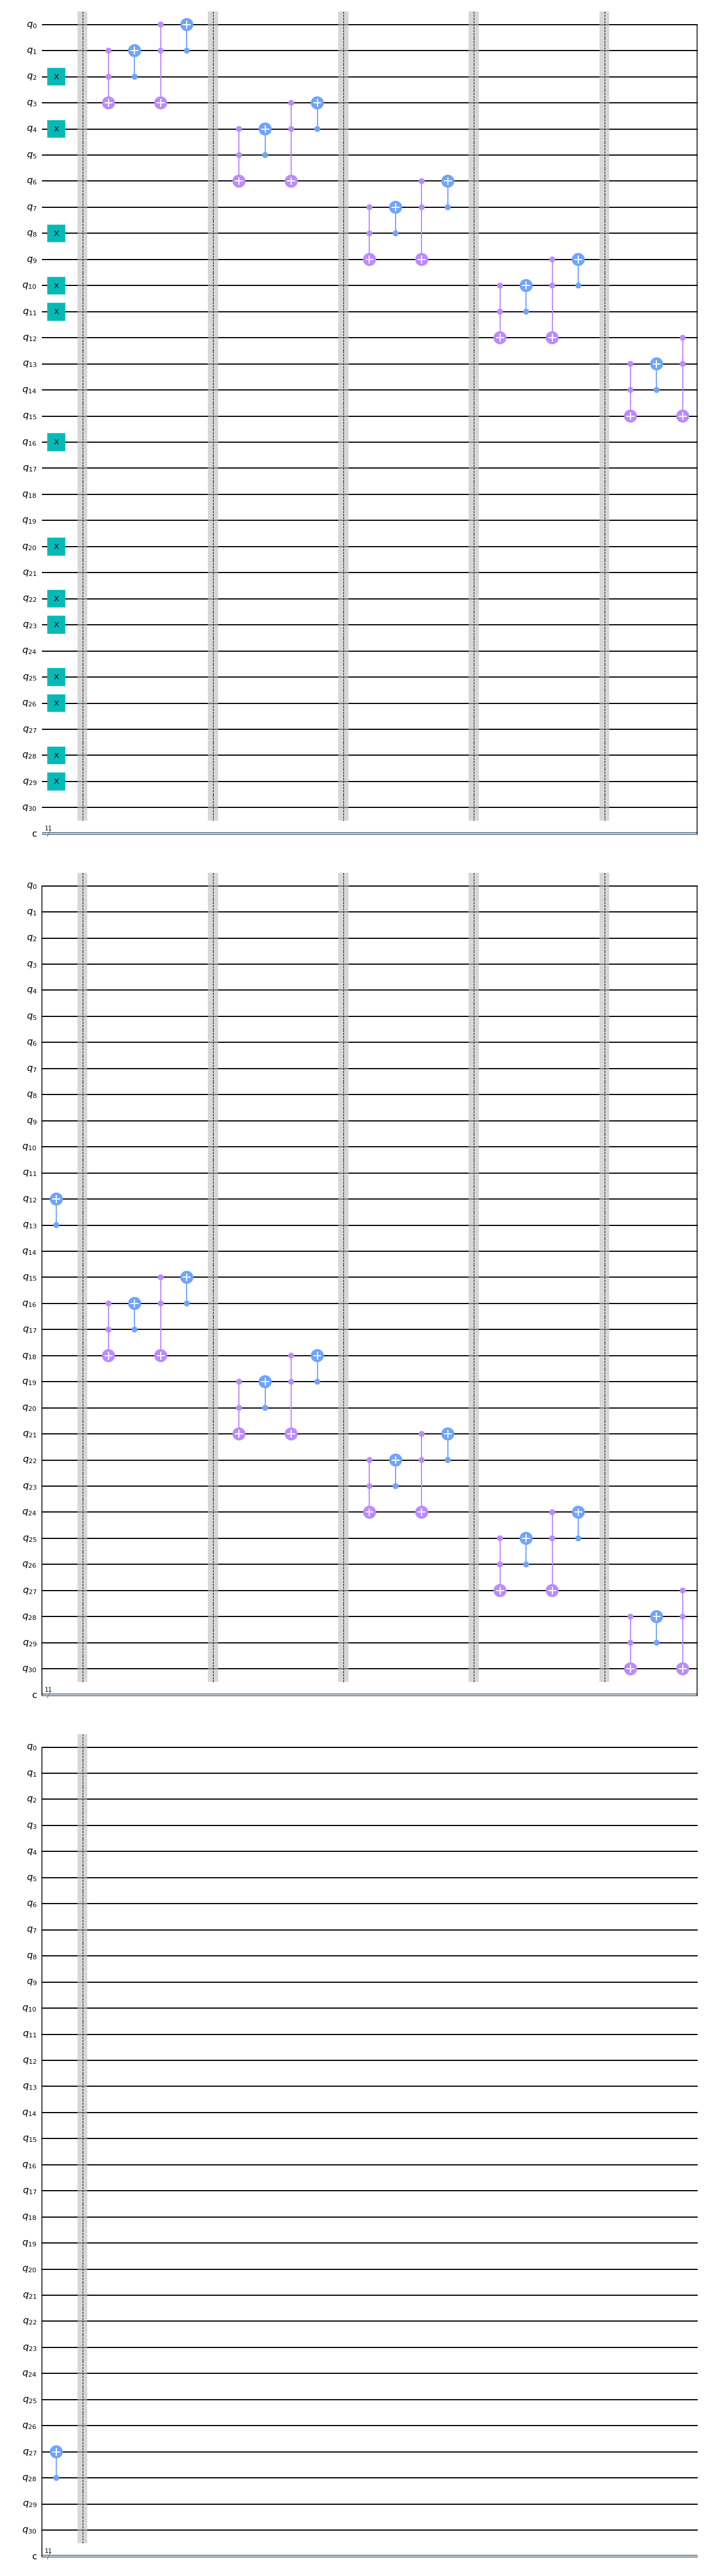

In [29]:
for i in range(len(b1)):
    t = 3 * i
    qc1 = qc1.compose(qc2, [t, t+1, t+2, t+3])
    qc1.barrier()
    
qc1.draw("mpl")

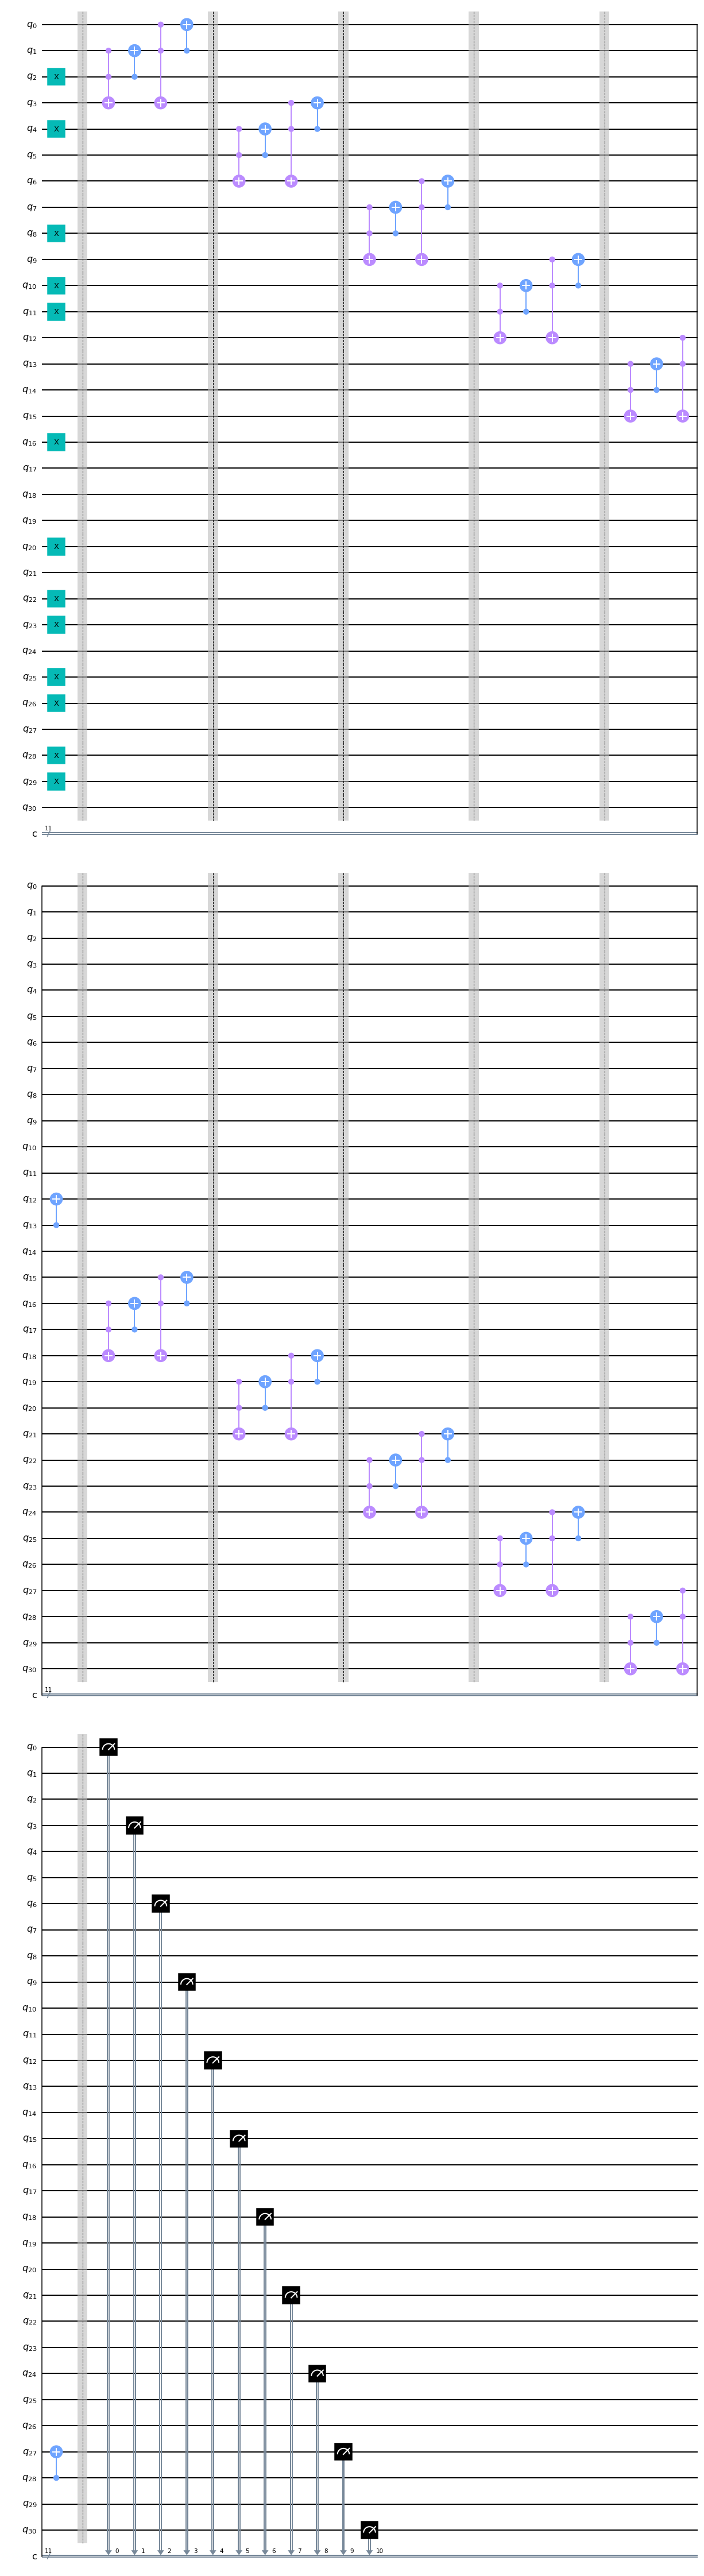

In [30]:
for i in range(len(b1) + 1):
    qc1.measure(3 * i, i)
qc1.draw("mpl")

# Run on qasm simulator for ideal results.

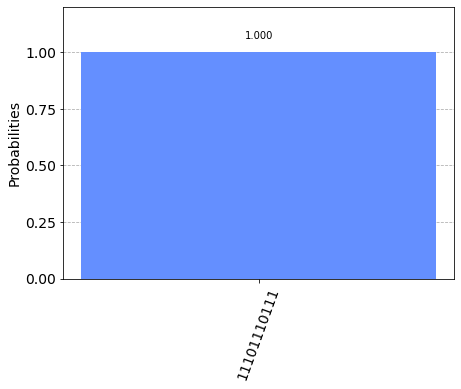

In [31]:
shots_num = 10000
job = execute(qc1, Aer.get_backend("qasm_simulator"), shots = shots_num)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)


In [32]:
print("Results:")
for i in counts:
    print(f"{int(i, 2)} with probability {counts[i] / shots_num}")

Results:
1911 with probability 1.0


# Run on real devices.

In [36]:
provider = IBMQ.get_provider(hub = "ibm-q")
backends = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator and x.status().operational==True)

print(backends)

# Configure the backend device as appropriate

#lb_backend = least_busy(backends)
lb_backend = provider.get_backend("ibmq_manila")

print(lb_backend.configuration().n_qubits)
lb_backend.status()

[<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]
5


Most of the real Quantum devices support only 5 qubits, so we can (for now) perform only 1 + 1, or if set the first carry bit, we can do 1 + 1 + 1.

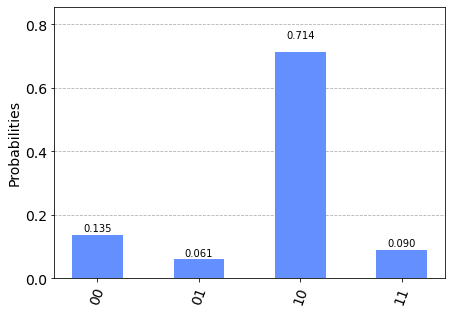

In [34]:
#job = execute(qc1, lb_backend, shots=10000)

job= lb_backend.retrieve_job("628392f87fe3b8612d19e73d")

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [35]:
print("Results:")
for i in counts:
    print(f"{int(i, 2)} with probability {counts[i] / shots_num}")

Results:
0 with probability 0.1352
1 with probability 0.0611
2 with probability 0.7136
3 with probability 0.0901
